Información del modelo:
Vértices: 4496
Aristas: 5352
Caras: 1784


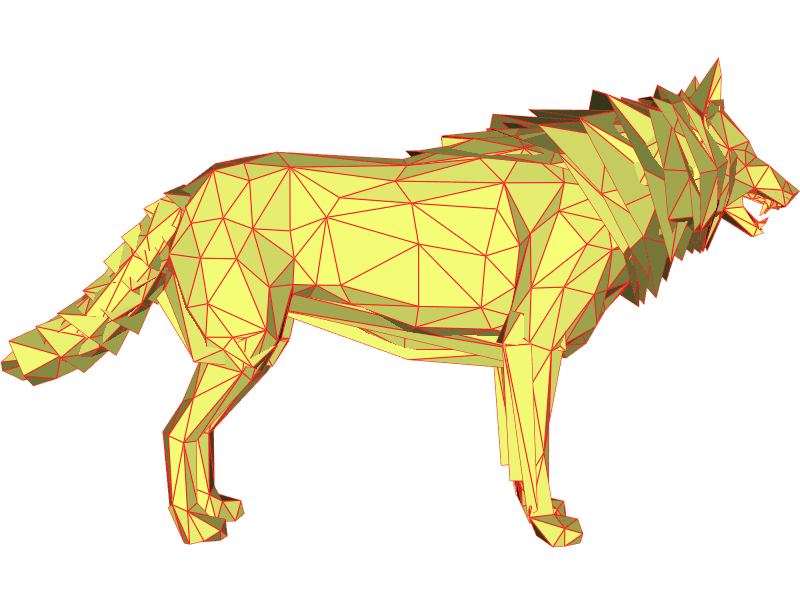

In [1]:
#!pip install trimesh vedo numpy matplotlib imageio
# Paso 1: Importar librerías necesarias

# Paso 2: Importar librerías
import trimesh
import vedo
import numpy as np
import imageio
from IPython.display import Image

# Paso 3: Cargar modelo OBJ y eliminar colores existentes
mesh = trimesh.load('wolf.obj')

# Eliminar cualquier color existente
mesh.visual.vertex_colors = None
mesh.visual.face_colors = None

# Paso 4: Configurar colores personalizados
color_vertices = 'black'          # Negro
color_aristas = 'red'                   # Rojo
color_caras = (247, 255, 120)   # Amarillo claro (RGB)

# Paso 5: Visualización con nuevos colores
plt = vedo.Plotter(shape=(1,3), axes=0)

# Vértices en rojo
plt.show(vedo.Points(mesh.vertices, c=color_vertices), at=0, title="Vértices")

# Aristas en negro
edges_vedo = vedo.Lines(
    mesh.vertices[mesh.edges[:,0]],
    mesh.vertices[mesh.edges[:,1]],
    c=color_aristas,
    lw=1
)
plt.show(edges_vedo, at=1, title="Aristas")

# Caras en gris claro con bordes negros
mesh_vedo = vedo.Mesh([mesh.vertices, mesh.faces])
mesh_vedo.c(color_caras).lc(color_aristas).lw(1)
plt.show(mesh_vedo, at=2, title="Caras")

# Paso 6: Información estructural
print("Información del modelo:")
print(f"Vértices: {len(mesh.vertices)}")
print(f"Aristas: {len(mesh.edges)}")
print(f"Caras: {len(mesh.faces)}")

# Animación modificada con colores correctos
def generar_animacion():
    plotter = vedo.Plotter(offscreen=True, bg='white')
    vedo_mesh = vedo.Mesh([mesh.vertices, mesh.faces])
    vedo_mesh.c(color_caras).lc(color_aristas).lw(1)  # Color caras y bordes

    frames = []
    for angulo in np.linspace(0, 360, 72):
        plotter.show(vedo_mesh, azimuth=angulo)
        frames.append(plotter.screenshot(asarray=True))
    
    imageio.mimsave('rotacion.gif', frames, fps=20, loop=0)
    return Image("rotacion.gif")

# Generar y mostrar animación
generar_animacion()



#LOS VERTICES NO SE LOGRAN DIFRENCIAR EN EL MODELO POR EL TAMAÑO
#color_vertices = Negros
#color_aristas = Rojo
#color_caras = Amarillo claro (RGB)